In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img1 = cv2.imread('/content/hidden_image.JPG')
img2 = cv2.imread('/content/natural.png')

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

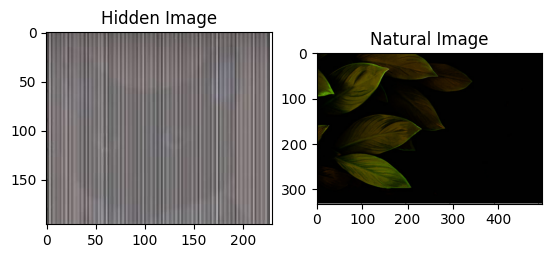

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[0].title.set_text('Hidden Image')
ax[1].imshow(img2)
ax[1].title.set_text('Natural Image')

In [ ]:
size = 15
theta = 0
psy = 0
sigma = 5
lamda = 2
gamma = 0

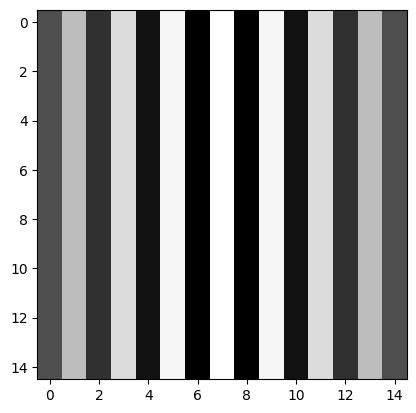

In [ ]:
gabor = cv2.getGaborKernel((size, size), sigma, theta, lamda, gamma, psy)
plt.imshow(gabor, cmap='gray')

## Conclusion for λ
---
- If wavelength is reduced from 10 to 2, number of white stripes increase as lambda is reduced from 10 to 5. This is becasue more number of peaks of sine wave of gabor filter increases.
- This filter is usefull to highlight more than one edge in the filter size.


In [ ]:
size = 101
theta = (np.pi)/2
psy = 0
sigma = 5
lamda = 5
gamma = 0

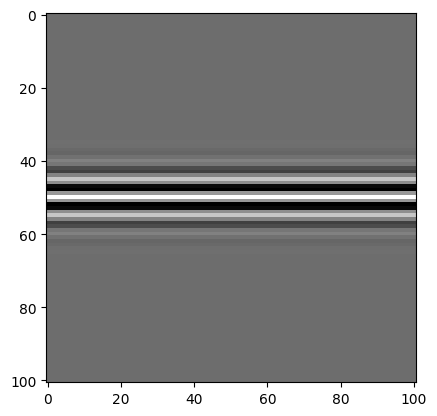

In [ ]:
gabor = cv2.getGaborKernel((size, size), sigma, theta, lamda, gamma, psy)
plt.imshow(gabor, cmap='gray')

## Conclusion for λ
---
- If wavelength is reduced from 10 to 2, number of white stripes increase as lambda is reduced from 10 to 5. This is becasue more number of peaks of sine wave of gabor filter increases.
- This filter is usefull to highlight more than one edge in the filter size.


In [ ]:
size = 101
theta = 0
psy = 0
sigma = 5
lamda = 5
gamma = 0.2

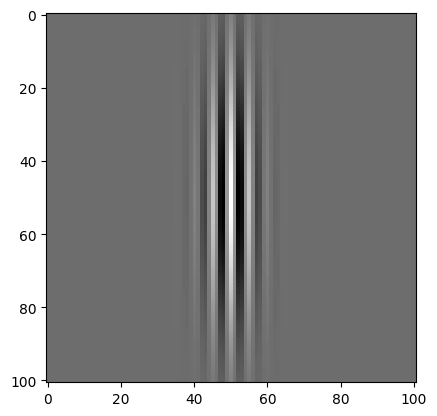

In [ ]:
gabor = cv2.getGaborKernel((size, size), sigma, theta, lamda, gamma, psy)
plt.imshow(gabor, cmap='gray')

## Conclusion for λ
---
- If wavelength is reduced from 10 to 2, number of white stripes increase as lambda is reduced from 10 to 5. This is becasue more number of peaks of sine wave of gabor filter increases.
- This filter is usefull to highlight more than one edge in the filter size.


In [ ]:
size = 15
theta = 0
psy = 0
sigma = 10
lamda = 10
gamma = 0

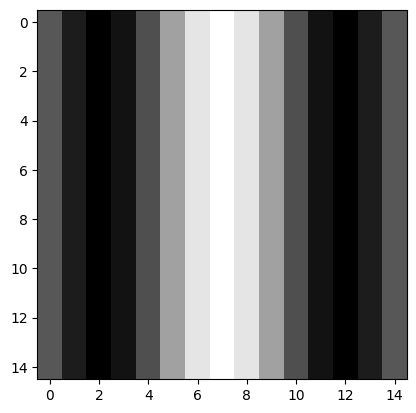

In [ ]:
gabor = cv2.getGaborKernel((size, size), sigma, theta, lamda, gamma, psy)
plt.imshow(gabor, cmap='gray')

In [ ]:
size = 15
theta = np.pi/2
psy = 0
sigma = 10
lamda = 25
gamma = 0

In [ ]:
gabor = gabor/gabor.sum()
img1_filtered = cv2.filter2D(img1, -1, gabor)

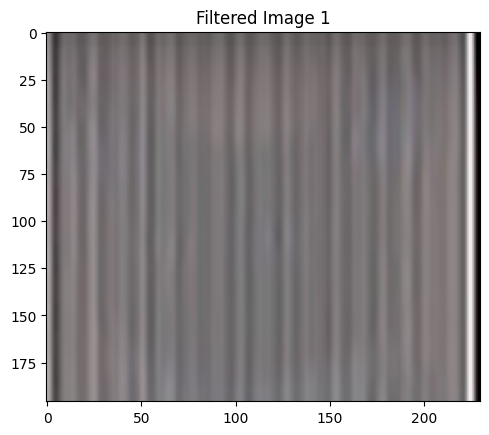

In [ ]:
plt.imshow(img1_filtered)
plt.title('Filtered Image 1')
plt.show()

Gabor filter is constructed to filter the image with vertical stripes. Filtered image has vertical stripes with lesser internsity. To further reduce it, std is increased from 2 to 5.

In [ ]:
filters = []
num_filters = 16
size = 31
theta = 0
psy = 0
sigma = 3
lamda = 10
gamma = 0.5

for theta in np.arange(0, np.pi, np.pi/num_filters):
  gabor = cv2.getGaborKernel((size, size), sigma, theta, lamda, gamma, psy)
  gabor = gabor/gabor.sum()
  filters.append(gabor)

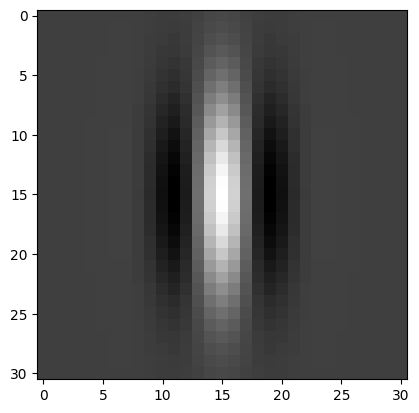

In [ ]:
plt.imshow(filters[0], cmap='gray')

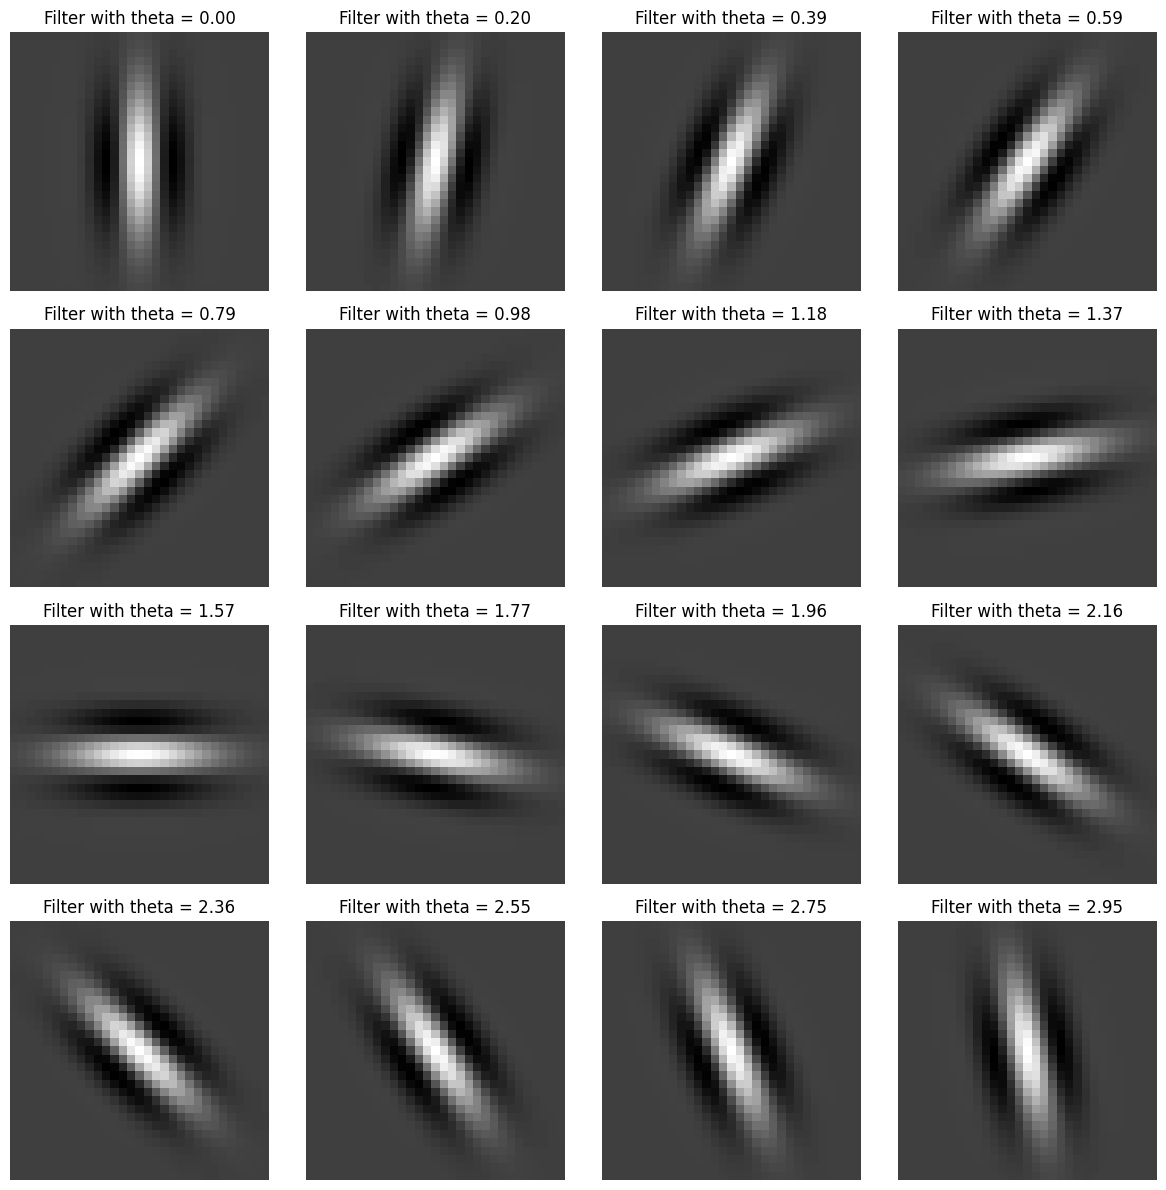

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()

for i, theta in enumerate(np.arange(0, np.pi, np.pi/num_filters)):
    gabor = cv2.getGaborKernel((size, size), sigma, theta, lamda, gamma, psy)
    gabor = gabor / gabor.sum()
    filters.append(gabor)
    axes[i].imshow(gabor, cmap='gray')
    axes[i].set_title(f"Filter with theta = {theta:.2f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


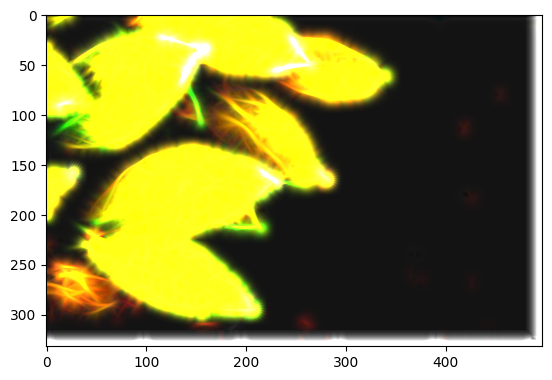

In [ ]:
img_h = np.zeros_like(img2)

for filter in filters:
  temp = cv2.filter2D(img2, -1, filter)
  img_h = np.maximum(img_h, temp)

plt.imshow(img_h)